<a href="https://colab.research.google.com/github/lagamaite/CSC-522-P30/blob/main/Data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import seaborn as sns


#downlaod MNIST data
(x_train, y_train),(x_test, y_test) = mnist.load_data()


Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step


In [ ]:
# Divided training data into "good" and "bad" sets
# bad size is 10000 instances
def divide_data(bad, train_images, train_labels):
  bad_images = train_images[:bad] # bad image data
  to_bad_labels = train_labels[:bad] # dataset to be converted to bad labels
  bad_labels = [np.mod(x+1,10) for x in to_bad_labels]  # increasing all lables value by 1

  good_images = train_images[bad:] # remaining data set is good images
  good_labels = train_labels[bad:] # remaining data set is good labels
  return good_images, good_labels, bad_images, bad_labels # return good and bad set of data

In [ ]:

def create_model(input_size, neu1, neu2, output_size):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(neu1))
  model.add(Activation("relu"))
  model.add(Dropout(0.45))
  model.add(Dense(neu2))
  model.add(Activation("relu"))
  model.add(Dropout(0.45))
  model.add(Dense(output_size))
  model.add(Activation("softmax"))
  model.compile(loss = "sparse_categorical_crossentropy", optimizer= "adam", metrics=["accuracy"])
  return model 


In [ ]:
train_accuracy = []
test_accuracy = []

#number of labels
num_labels = len(np.unique(y_train))

# find the number of neurons in input layer 
image_size = x_train.shape[1]
input_size = image_size * image_size

# normalize the data
x_train = tf.keras.utils.normalize(x_train)
x_test = tf.keras.utils.normalize(x_test)


10000
50000





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 12s 197us/step - loss: 1.0246 - acc: 0.6782
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7264 - acc: 0.7647
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.6613 - acc: 0.7812
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.6288 - acc: 0.7905
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.6054 - acc: 0.7951
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.5872 - acc: 0.7992
Epoch 7/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.5780 - acc: 0.8010
Epoch 8/10
60000/60000 [==============================] - 2s 38

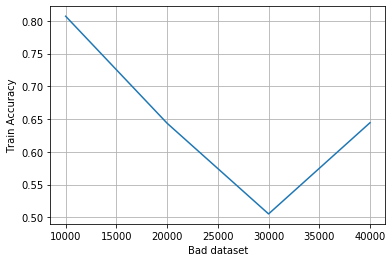

In [ ]:
sets = [10000,20000,30000,40000]
for x in sets: 
  mislabelled = []
  test_loss = 0
  test_acc = 0
  training_results = []
  good_i , good_l , bad_i, bad_l = divide_data(x, x_train, y_train)
  mislabelled = np.concatenate((bad_l,good_l)) 
  print(len(bad_l))
  print(len(good_l))

  fullset_model = create_model(input_size, 256, 128, num_labels) 
  # training with mislabelled data
  training_results = fullset_model.fit(x_train, mislabelled, epochs=10, shuffle= True, batch_size = 128)
  train_accuracy.append(training_results.history['acc'][9]) 
 
  # testing the model.
  test_loss, test_acc = fullset_model.evaluate(x_test,y_test)
  test_accuracy.append(test_acc)


print(train_accuracy)
print(test_accuracy)

plt.xlabel('Bad dataset')
plt.ylabel('Train Accuracy')
plt.plot(sets, train_accuracy)
plt.grid(True)


Epoch 1/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.0261 - acc: 0.6791
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7316 - acc: 0.7644
Epoch 3/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.6626 - acc: 0.7817
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.6276 - acc: 0.7900
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.6071 - acc: 0.7949
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5912 - acc: 0.7989
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5811 - acc: 0.8010
Epoch 8/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.5683 - acc: 0.8037
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5614 - acc: 0.8051
Epoch 10/10
10000/10000 [==============================] - 1s 126us/step
Epoch 1/10
10000/10000 [===

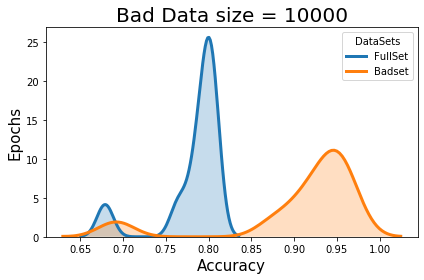

Epoch 1/10
60000/60000 [==============================] - 4s 74us/step - loss: 1.2224 - acc: 0.5103
Epoch 2/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.9100 - acc: 0.5928
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.8465 - acc: 0.6140
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8089 - acc: 0.6255
Epoch 5/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7878 - acc: 0.6297
Epoch 6/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.7703 - acc: 0.6359
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.7596 - acc: 0.6392
Epoch 8/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7487 - acc: 0.6406
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7410 - acc: 0.6433
Epoch 10/10
10000/10000 [==============================] - 1s 147us/step
Epoch 1/10
20000/20000 [===

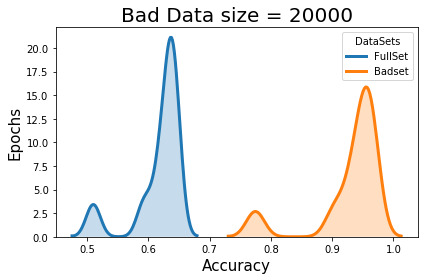

Epoch 1/10
60000/60000 [==============================] - 4s 73us/step - loss: 1.2675 - acc: 0.4224
Epoch 2/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.9568 - acc: 0.4774
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8917 - acc: 0.4850
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.8601 - acc: 0.4904
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8409 - acc: 0.4939
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.8213 - acc: 0.4991
Epoch 7/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.8099 - acc: 0.5009
Epoch 8/10
60000/60000 [==============================] - 2s 39us/step - loss: 0.8043 - acc: 0.5033
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7933 - acc: 0.5053
Epoch 10/10
10000/10000 [==============================] - 1s 143us/step
Epoch 1/10
30000/30000 [===

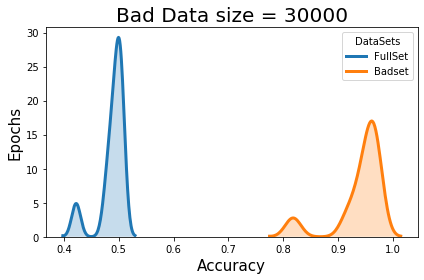

Epoch 1/10
60000/60000 [==============================] - 5s 76us/step - loss: 1.2142 - acc: 0.5107
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.9029 - acc: 0.5939
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.8390 - acc: 0.6159
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.8051 - acc: 0.6249
Epoch 5/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7833 - acc: 0.6311
Epoch 6/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.7712 - acc: 0.6361
Epoch 7/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.7552 - acc: 0.6379
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.7473 - acc: 0.6395
Epoch 9/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.7396 - acc: 0.6429
Epoch 10/10
10000/10000 [==============================] - 2s 151us/step
Epoch 1/10
40000/40000 [===

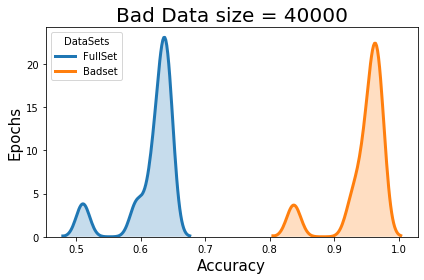

[0.9732, 0.9644, 0.5784, 0.0099]
[0.0034, 0.0028, 0.0026, 0.0018]


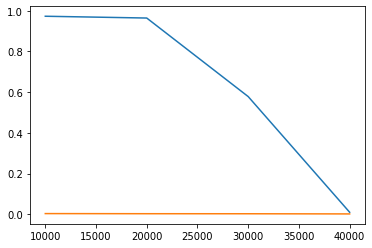

In [ ]:
accuracy = []
accuracyb = []
sets = [10000,20000,30000,40000]

for x in sets:
  # initializing
  mislabelled = []
  test_loss = 0
  test_acc = 0
  training_results = []
  loss = 0
  acc = 0
  lossb = 0
  accb = 0

  #creating different good and bad dataset
  good_i , good_l , bad_i, bad_l = divide_data(x, x_train, y_train)
  mislabelled = np.concatenate((bad_l,good_l)) 
  bad_l = np.array(bad_l)
 
  # training with complete data inclusing mislabelled data
  fullset_model = create_model(input_size, 256, 128, num_labels) 
  FullSet = fullset_model.fit(x_train, mislabelled, epochs=10, shuffle= True, batch_size = 128)
  loss, acc = fullset_model.evaluate(x_test,y_test)
  
  # training model with only bad data
  badset_model = create_model(input_size, 256, 128, num_labels)
  BadSet = badset_model.fit(bad_i, bad_l, epochs = 10, shuffle = True, batch_size = 64)
  lossb, accb = badset_model.evaluate(x_test,y_test)

  accuracy.append(acc)
  accuracyb.append(accb)

  vars = { "FullSet" : FullSet , "Badset" : BadSet}

  for name,v in vars.items():
    sns.distplot(v.history["acc"], hist = False, kde = True,
                   kde_kws = {'shade': True, 'linewidth': 3},
                   label = name )
  
 
  plt.legend(prop={'size': 10}, title = 'DataSets')
  print('Bad Data size = %d' % x, size = 20)
  plt.xlabel('Accuracy', size = 15)
  plt.ylabel('Epochs', size= 15)
  plt.tight_layout()
  plt.show()

plt.plot(sets,accuracy)
plt.grid()
print(accuracy)
plt.plot(sets,accuracyb)
plt.grid()
print(accuracyb)